In [ ]:
import pandas as pd
df=pd.read_csv('test.csv',delimiter=';')
print("entries:",df.shape[0])
df.head()

entries: 6346


,"UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced"
0,"255504,,140,163,26,Michigan,MI,Detroit,Dearbor..."
1,"252676,,140,1,23,Maine,ME,Auburn,Auburn City,C..."
2,"276314,,140,15,42,Pennsylvania,PA,Pine City,Mi..."
3,"248614,,140,231,21,Kentucky,KY,Monticello,Mont..."
4,"286865,,140,355,48,Texas,TX,Corpus Christi,Edr..."


For handling NaN values in second mortgage column,it is replaced by mean of second mortgage mean values of cities for calculation accuracy

In [ ]:
df.isna().sum()

In [ ]:
df["second_mortgage"]=df["second_mortgage"].fillna(df["second_mortgage"].mean())
print(df["second_mortgage"].head())

0    0.06443
1    0.01175
2    0.01316
3    0.00995
4    0.00000
Name: second_mortgage, dtype: float64


The dataframe is sorted based on the second mortgage column in descending order and then home equity greater than 10% and second mortgage
upper limit 50% are applied on it.Then the top 2500 cities are chosen from the manipulated for requirement data

In [ ]:
df1=df[(df["second_mortgage"]<=0.5) & (df["home_equity"]>0.1)].sort_values(by='second_mortgage',ascending=False)
df1=df1.reset_index().head(2500)
print(df1["second_mortgage"])

0       0.40000
1       0.38889
2       0.30303
3       0.28488
4       0.26036
         ...   
2495    0.03896
2496    0.03896
2497    0.03896
2498    0.03895
2499    0.03894
Name: second_mortgage, Length: 2500, dtype: float64


scatter_geo function from the plotly.express library is used to plot a geo plot of the top 2500 cities with above second mortgage and home equity restraints

In [ ]:
import plotly.express as px
df1["state"]=df1["state"].astype(str)
df1["home_equity"]=df1["home_equity"].fillna(df["home_equity"].mean())
fig=px.scatter_geo(df1,lat=df1["lat"],lon=df1["lng"],projection="orthographic",hover_data={"city":True,"second_mortgage":True,"home_equity":True},title="2nd mortgage and home quity representations")
fig.show()

using the bad debt formula and adding a column to the dataframe.Then,filling the NaN values with the mean bad debt for calculation accuracy.

In [ ]:
df["bad_debt"]=df["second_mortgage"]+df["home_equity"]-df["home_equity_second_mortgage"]
df["bad_debt"]=df["bad_debt"].fillna(df["bad_debt"].mean())

Creating a function is optimal with its argument as the state name which return the mean bad debt of that state.

In [ ]:
def func(state):
  df1=df.loc[df["state"]==f"{state}","bad_debt"]
  return df1.mean()

map function is used to get mean bad debt of all the unique states of the data and map object converted to list

In [ ]:
states=list(df["state"].unique())
state_ab=list(df["state_ab"].unique())
bdebt=list(map(func,states))

bar fucntion from the matplotlib library is used to plot mean bad debts of each state

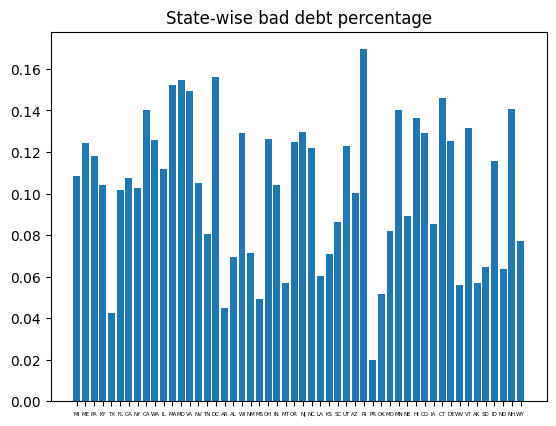

['MI', 'ME', 'PA', 'KY', 'TX', 'FL', 'GA', 'NY', 'CA', 'WA', 'IL', 'MA', 'MD', 'VA', 'NV', 'TN', 'DC', 'AR', 'AL', 'WI', 'NM', 'MS', 'OH', 'IN', 'MT', 'OR', 'NJ', 'NC', 'LA', 'KS', 'SC', 'UT', 'AZ', 'RI', 'PR', 'OK', 'MO', 'MN', 'NE', 'HI', 'CO', 'IA', 'CT', 'DE', 'WV', 'VT', 'AK', 'SD', 'ID', 'ND', 'NH', 'WY']


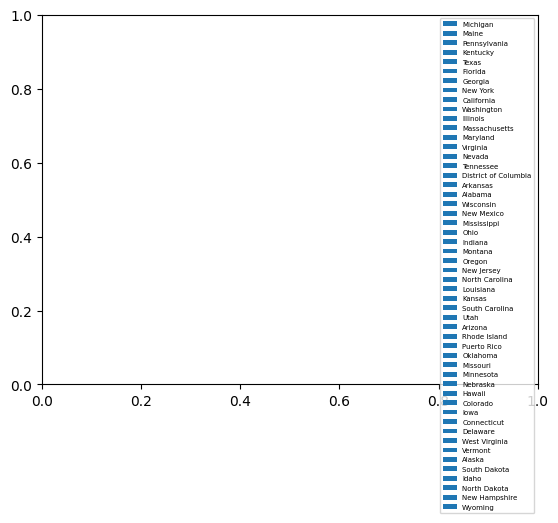

In [ ]:
import matplotlib.pyplot as plt
k=plt.bar(state_ab,bdebt)
plt.title("State-wise bad debt percentage")
plt.xticks(fontsize=4)
plt.show()
plt.legend(k,states,fontsize=5)
print(state_ab)

the mean overall and bad debt of the entire data are plotted on a pie chart to get a visual representation of total debt distribution

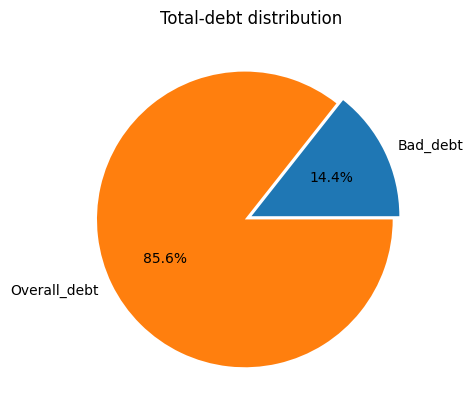

In [ ]:
bdebt_mean=df["bad_debt"].mean()
ovdebt_mean=df["debt"].mean()
plt.pie([bdebt_mean,ovdebt_mean],labels=["Bad_debt","Overall_debt"], explode= [0,0.05], autopct='%1.1f%%')
plt.title("Total-debt distribution")
plt.savefig("debt pie chart.png")
plt.show()

In [ ]:
print(df["city"].unique().shape[0])

4369


In [ ]:
print((df["hi_mean"]>=df["family_mean"]).sum())

1020


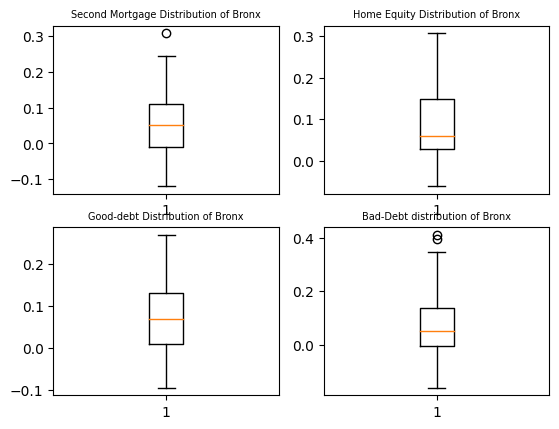

In [ ]:
import numpy.random as npr
def graph_analysis(city):
  df1=df[df["city"]==f"{city}"]
  mort_m=df1["second_mortgage"].mean()
  mort_std=df1["second_mortgage"].std()
  mort_s=df1["second_mortgage"].shape[0]
  mort=npr.normal(mort_m,mort_std,mort_s)
  plt.subplot(2,2,1)
  plt.boxplot(mort)
  plt.title(f"Second Mortgage Distribution of {city}",fontsize=7)

  he_m=df1["home_equity"].mean()
  he_std=df1["home_equity"].std()
  he_s=df1["home_equity"].shape[0]
  he=npr.normal(he_m,he_std,he_s)
  plt.subplot(2,2,2)
  plt.boxplot(he)
  plt.title(f"Home Equity Distribution of {city}",fontsize=7)

  gd_m=df1["home_equity"].mean()
  gd_std=df1["home_equity"].std()
  gd_s=df1["home_equity"].shape[0]
  gd=npr.normal(gd_m,gd_std,gd_s)
  plt.subplot(2,2,3)
  plt.boxplot(gd)
  plt.title(f"Good-debt Distribution of {city}",fontsize=7)

  bd_m=df1["bad_debt"].mean()
  bd_std=df1["bad_debt"].std()
  bd_s=df1["bad_debt"].shape[0]
  bd=npr.normal(bd_m,bd_std,bd_s)
  plt.subplot(2,2,4)
  plt.boxplot(bd)
  plt.title(f"Bad-Debt distribution of {city}",fontsize=7)

graph_analysis("Bronx")

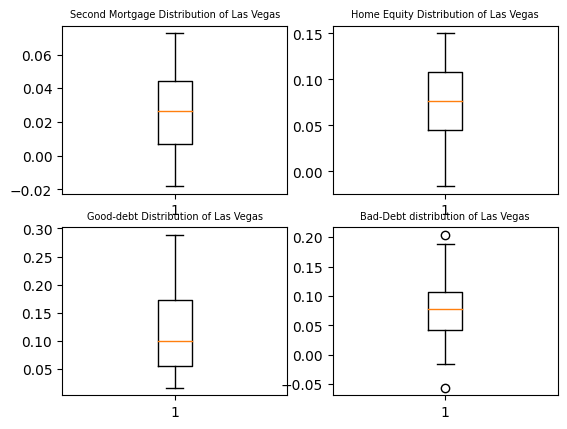

In [ ]:
graph_analysis("Las Vegas")

In [ ]:
#considering mean family,household and reamining incomes of the data to get a perfect representation of the income dstribution
fam_m=df["family_mean"].mean()
print(fam_m)
hi_m=df["hi_mean"].mean()
rem_m=(df["family_mean"]-df["rent_mean"]-df["debt"]).mean()
print(rem_m)

78419.21743136235
77622.53577


([<matplotlib.axis.XTick at 0x7f0d61a91c30>,
 [Text(2.8, 0, 'family_income'),
  Text(3.0, 0, 'household_income'),
  Text(3.2, 0, 'remaining_income')])

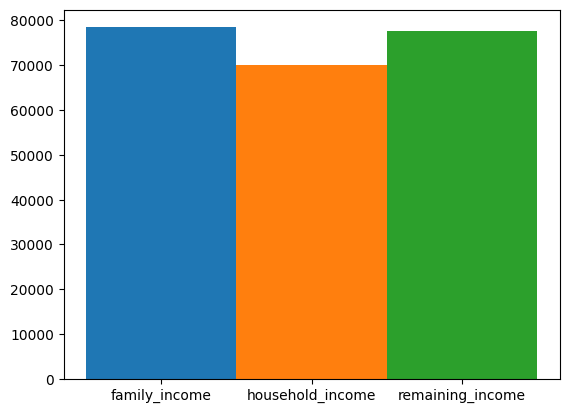

In [ ]:
plt.bar(3-0.2,fam_m,width=0.2,)
plt.bar(3,hi_m,width=0.2)
plt.bar(3+0.2,rem_m,width=0.2)
plt.xticks([2.8,3.0,3.2],["family_income","household_income","remaining_income"])

In [ ]:
#Task-2
#assuming that the land area is given in 100sq meters,converting it to sq km by multiplying it with 10^-4.
df["ALand"]=df["ALand"]/10**4
df["pop_density"]=df["pop"]/df["ALand"]
print(df["pop_density"].head(20))

0      12.602903
1       2.568547
2       0.152335
3       0.049991
4       4.515783
5       4.206179
6       0.691375
7     108.904609
8      15.043549
9       0.082512
10      6.556848
11      0.097093
12     42.664976
13     17.727416
14      9.882719
15     18.117892
16     23.362803
17     11.814564
18     35.414534
19     20.424117
Name: pop_density, dtype: float64


In [ ]:
df["median_age"]=(df["male_age_median"]*df["male_pop"]+df["female_age_median"]*df["female_pop"])/(df["male_pop"]+df["female_pop"])

In [ ]:
print(df["median_age"].head(10))

0    31.189053
1    46.382991
2    43.147420
3    45.155104
4    43.235983
5    51.204630
6    42.565539
7    46.423262
8    27.660864
9    43.670921
Name: median_age, dtype: float64


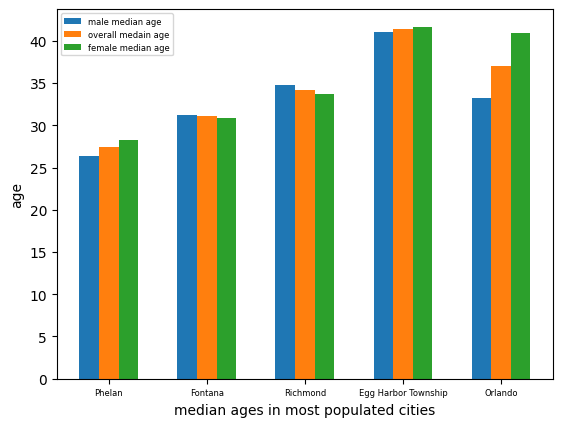

In [ ]:
import numpy as np
fig,ax=plt.subplots()
df1=df.sort_values(by="pop",ascending=False)
ax.bar(np.arange(5)-0.2,df1["male_age_median"].head().tolist(),width=0.2,label="male median age")
ax.bar(np.arange(5),df1["median_age"].head().tolist(),width=0.2,label="overall medain age")
ax.bar(np.arange(5)+0.2,df1["female_age_median"].head().tolist(),width=0.2,label="female median age")
ax.set_xticks(np.arange(5))
ax.set_xticklabels(df1["city"].head().tolist(),fontsize=6)
ax.set_xlabel("median ages in most populated cities")
ax.set_ylabel("age")
ax.legend(fontsize=6)
plt.show()

In [ ]:
median=df["pop"].median()
max=df["pop"].max()
min=df["pop"].min()
binval=[min,median/2,median,median+median/2,max]
bins=["sparsely_populated","less_populaetd","averagely_populated","highly_populated"]
df["pop_bracket"]=pd.cut(df["pop"],binval,labels=bins,include_lowest=True)
print(df["pop_bracket"].unique())

['less_populaetd', 'highly_populated', 'sparsely_populated', 'averagely_populated']
Categories (4, object): ['sparsely_populated' < 'less_populaetd' < 'averagely_populated' <
                         'highly_populated']


In [ ]:
def marry(bracket):
   mar=df.loc[df["pop_bracket"]==f"{bracket}","married"].mean()*100
   return mar
married=list(map(marry,bins))
def sep(bracket):
  sep=df.loc[df["pop_bracket"]==f"{bracket}","separated"].mean()*100
  return sep
separated=list(map(sep,bins))
def div(bracket):
  div=df.loc[df["pop_bracket"]==f"{bracket}","divorced"].mean()*100
  return div
divorced=list(map(div,bins))

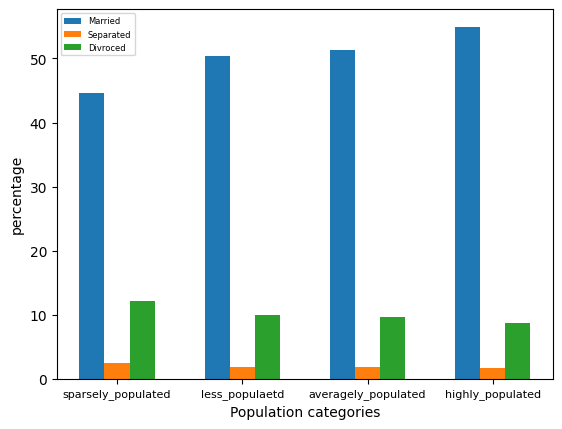

In [ ]:
fig,ax=plt.subplots()
ax.bar(np.arange(4)-0.2,married,width=0.2,label="Married")
ax.bar(np.arange(4),separated,width=0.2,label="Separated")
ax.bar(np.arange(4)+0.2,divorced,width=0.2,label="Divroced")
ax.set_xticks(np.arange(4))
ax.set_xticklabels(bins,fontsize=8)
ax.set_xlabel("Population categories")
ax.set_ylabel("percentage")
ax.legend(fontsize=6)
plt.show()

In [ ]:
df["rent_per"]=(df["rent_mean"]/df["family_mean"])*100
def rent(state):
  df1=df.loc[df["state"]==f"{state}","rent_per"]
  return df1.mean()
states=df.sort_values(by="family_mean",ascending=False).head(10)["state"].tolist()
rent_pr=list(map(rent,states))
states.append("overall")
rent_pr.append(df["rent_per"].mean())

In [ ]:
sorted_df=df.sort_values(by="family_mean",ascending=False)
top_states=sorted_df.head(500)["rent_per"].mean()
last_states=sorted_df.tail(500)["rent_per"].mean()
if(top_states>other_states):
  print("rent as a percentage of income in cities with most family mean income is ",(last_states/top_states)*100,"% more than cities with least family mean income")
  print("rent as a percentage of income increases with income i.e. positive correlation")
else:
  print("rent as a percentage of income in cities with least family mean income is ",(top_states/last_states)*100,"% more than cities with most family mean income")
  print("rent as a percentage of income decreases with income i.e. negative correlation")


rent as a percentage of income in cities with least family mean income is  59.76629761233833 % more than cities with most family mean income
rent as a percentage of income decreases with income i.e. negative correlation


Text(0.5, 1.0, 'rent as a percentage of income')

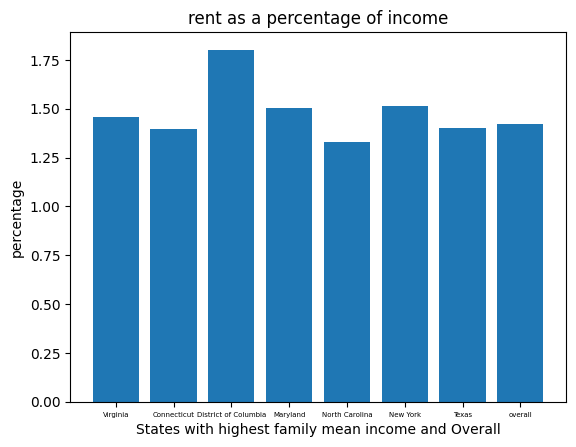

In [ ]:
plt.bar(states,rent_pr)
plt.xticks(fontsize=5)
plt.xlabel("States with highest family mean income and Overall")
plt.ylabel("percentage")
plt.title("rent as a percentage of income")

                 family_mean       pop  rent_mean  home_equity  \
family_mean         1.000000  0.135360   0.704727     0.452124   
pop                 0.135360  1.000000   0.161251     0.101844   
rent_mean           0.704727  0.161251   1.000000     0.411733   
home_equity         0.452124  0.101844   0.411733     1.000000   
second_mortgage     0.064836  0.073528   0.147264     0.489811   
debt                0.376976  0.231298   0.434982     0.534077   

                 second_mortgage      debt  
family_mean             0.064836  0.376976  
pop                     0.073528  0.231298  
rent_mean               0.147264  0.434982  
home_equity             0.489811  0.534077  
second_mortgage         1.000000  0.347994  
debt                    0.347994  1.000000  


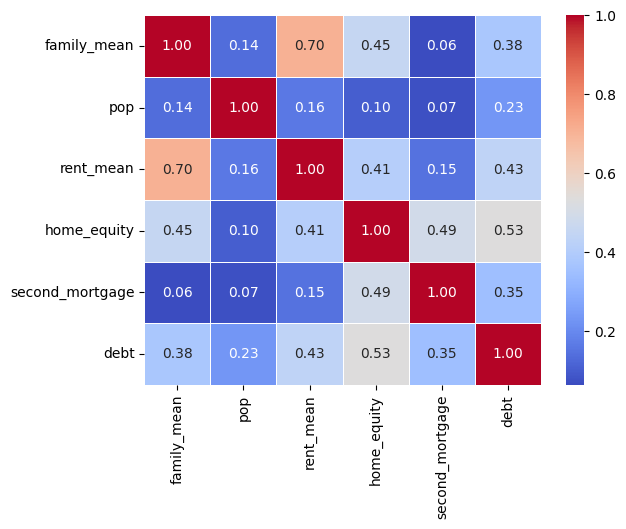

In [ ]:
import seaborn as sb
rel_var=df[["family_mean","pop","rent_mean","home_equity","second_mortgage","debt"]]
print(rel_var.corr())
sb.heatmap(rel_var.corr(),annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.7)
plt.show()